<a href="https://colab.research.google.com/github/Jayashree24092004/Project_fitforest/blob/main/Fitforest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
# ================================
# 🌿 FitForest AI - Colab Version
# ================================

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import joblib
import time
import matplotlib.pyplot as plt
from IPython.display import clear_output, display

# ------------------------
# STEP 1: Train the model
# ------------------------

print("📥 Loading user data...")
df = pd.read_csv('user_profiles.csv')

# Encode categorical variables
le_gender = LabelEncoder().fit(df['Gender'])
le_goal = LabelEncoder().fit(df['Goal'])

X = pd.DataFrame({
    'Age': df['Age'],
    'Gender': le_gender.transform(df['Gender']),
    'Goal': le_goal.transform(df['Goal'])
})
y = df['PlanID']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Accuracy check
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"✅ Model trained. Accuracy: {acc:.2f}")

# Save model & encoders
joblib.dump(model, 'model.pkl')
joblib.dump({'le_gender': le_gender, 'le_goal': le_goal}, 'encoders.pkl')
print("💾 Model and encoders saved.")



📥 Loading user data...
✅ Model trained. Accuracy: 1.00
💾 Model and encoders saved.



✅ Your AI Fitness Plan
🔮 PlanID: 2
🍱 Meal: Veg thali (balanced) + fruit bowl + curd (maintenance)
💪 Workout: Cardio + core: brisk walk/jog + planks + lunges
⏱ Duration: 1 minutes

⏳ Time Left: 00:01

🏁 Workout Completed! 🌱 A tree has been planted!


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127795 (\N{DECIDUOUS TREE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


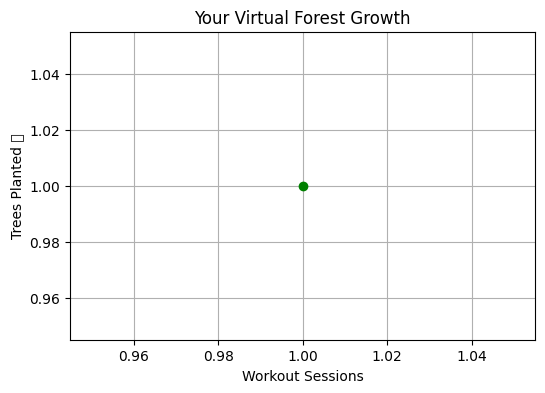

In [ ]:
# ------------------------
# STEP 2: AI Fitness App
# ------------------------

# Reload model & encoders
model = joblib.load("model.pkl")
encoders = joblib.load("encoders.pkl")
le_gender = encoders['le_gender']
le_goal = encoders['le_goal']

# Load datasets
meals = pd.read_csv("meals.csv").set_index("PlanID")
workouts = pd.read_csv("workouts.csv").set_index("PlanID")

# Track progress
trees_planted = 0
history = []

while True:
    print("\n🌿 Welcome to FitForest AI 🌿")
    try:
        age = int(input("Enter Age (10-80): "))
        gender = input("Enter Gender (Male/Female): ").capitalize()
        goal = input("Enter Goal (lose weight / gain muscle / stay fit): ").lower()
        time_min = int(input("Enter Workout Time (minutes): "))
    except ValueError:
        print("❌ Invalid input, try again.")
        continue

    # Encode input
    input_data = pd.DataFrame({"Age": [age], "Gender": [gender], "Goal": [goal]})
    input_data["Gender"] = le_gender.transform(input_data["Gender"])
    input_data["Goal"] = le_goal.transform(input_data["Goal"])

    # Predict PlanID
    plan_id = model.predict(input_data)[0]

    # Safe lookup
    meal = meals["Meal"].get(plan_id, "No meal found")
    workout = workouts["Workout"].get(plan_id, "No workout found")

    # Show plan (BEFORE countdown so it's not cleared)
    print("\n✅ Your AI Fitness Plan")
    print(f"🔮 PlanID: {plan_id}")
    print(f"🍱 Meal: {meal}")
    print(f"💪 Workout: {workout}")
    print(f"⏱ Duration: {time_min} minutes")

    # Timer (short demo version: 10 sec, replace with time_min*60 for real)
    print("\n⏳ Starting Workout Timer...")
    for remaining in range(10, 0, -1):
        mins, secs = divmod(remaining, 60)
        clear_output(wait=True)
        # Re-display plan + countdown
        print("\n✅ Your AI Fitness Plan")
        print(f"🔮 PlanID: {plan_id}")
        print(f"🍱 Meal: {meal}")
        print(f"💪 Workout: {workout}")
        print(f"⏱ Duration: {time_min} minutes")
        print(f"\n⏳ Time Left: {mins:02d}:{secs:02d}")
        time.sleep(1)

    # Finish
    print("\n🏁 Workout Completed! 🌱 A tree has been planted!")
    trees_planted += 1
    history.append(trees_planted)

    # Graph progress (with meal & workout info kept visible)
    plt.figure(figsize=(6,4))
    plt.plot(range(1, trees_planted+1), history, marker="o", linestyle="-", color="green")
    plt.xlabel("Workout Sessions")
    plt.ylabel("Trees Planted 🌳")
    plt.title("Your Virtual Forest Growth")
    plt.grid(True)
    plt.show()

    # Continue?
    cont = input("\nDo you want to create another plan? (yes/no): ").lower()
    if cont != "yes":
        break

print("\n🌲 Final Forest Progress 🌲")
print(f"Total Trees Planted: {trees_planted}")